# Scraping Data from Amazon Website

In [1]:
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np 

ecommerce_site="https://www.amazon.com"
j=1
links = ["https://www.amazon.com/Vitamin-Serum-Face-Hyaluronic-Aging/dp/B074HTLXDS/ref=sr_1_1_a_it?ie=UTF8&qid=1524992576&sr=8-1&keywords=highest+reviews",
       "https://www.amazon.com/gp/product/B00V5ZB5WQ/ref=s9u_qpp_gw_i4?ie=UTF8&fpl=fresh&pd_rd_i=B00V5ZB5WQ&pd_rd_r=fb4c5d1b-2d96-11e8-a0c9-4ff59c1d47b8&pd_rd_w=i7Fdd&pd_rd_wg=dZ7zb&pf_rd_m=ATVPDKIKX0DER&pf_rd_s=&pf_rd_r=WP0PZVW7QFA58FQ6E3WY&pf_rd_t=36701&pf_rd_p=8f696f0a-3abd-4660-b9bd-1931764e0008&pf_rd_i=desktop",
        "https://www.amazon.com/Hyperbiotics-PRO-15-Probiotics-Technology-Supplement/dp/B00JEKYNZA/ref=sr_1_3_sspa?s=hpc&ie=UTF8&qid=1525032561&sr=1-3-spons&keywords=highest+review&psc=1",
        "https://www.amazon.com/NatureWise-Enhancement-Non-Stimulating-Gluten-Free-Safflower/dp/B00GB85MZI/ref=sr_1_15_sspa?s=hpc&ie=UTF8&qid=1525032561&sr=1-15-spons&keywords=highest+review&psc=1",
         "https://www.amazon.com/Vitamin-Serum-Face-Hyaluronic-Aging/dp/B074HTLXDS/ref=sr_1_32_s_it?s=hpc&ie=UTF8&qid=1525033066&sr=1-32&keywords=highest+review"]

for i in links:
    product_link=link=i
    page=Request(link, headers={'User-Agent': 'Mozilla/5.0'})
    page1=urlopen(page).read()
    soup = BeautifulSoup(page1, "html.parser")
    soup.prettify()

    ########## Product Name extracted ####done
    product_name=soup.title
    product_name.string
    product_full_name=str(product_name.string)
    print(product_full_name)

    ############# Product price ######done
    price =soup.find('span',attrs={"id" : "priceblock_ourprice","class" : "a-size-medium a-color-price"})
    price
    price.string
    price_product=str(price.string)
    print('Product Price:%0.3s'% price_product)

    ############ Number of reviews ######done
    Number_of_reviews =soup.find('span',attrs={"id":"acrCustomerReviewText","class":"a-size-base"})
    Number_of_reviews.string
    Number_reviews=Number_of_reviews.string
    print('Number_reviews:')
    print(Number_reviews)
    ############# To extract Overall ratings ###### done
    Main_rating=soup.find('div',attrs={"id" : "leftCol","class" : "a-section burj"})
    Main_rating
    lis = Main_rating.find_all('span',attrs={"class" : 'a-icon-alt'})
    for i in [len(lis)-1]:
        print(lis[i].string)
        final_ratings=str(lis[i].string)    

    ###### Extract all reviews link####### done

    all_reviews_link =soup.find('a',attrs={"data-hook" : "see-all-reviews-link-foot","class" : "a-link-emphasis a-text-bold"})['href']
    all_reviews_link

    all_reviews_page_link=ecommerce_site + all_reviews_link
    all_reviews_page_link

    ######## Extract no. of pages ##### done
    product_review_pages_link=[]
    product_review_pages_link.append(all_reviews_page_link)

    ######################################## For reviews,summary,links #####
    reviews=[]
    summary=[]
    product_review_pages_link=[]
    stars=[]

    product_review_pages_link.append(all_reviews_page_link)

    try:
        while True:
            page_allrev=Request(product_review_pages_link[len(product_review_pages_link)-1], headers={'User-Agent': 'Mozilla/5.0'})
            page1_allrev=urlopen(page_allrev).read()
            all_page_soup= BeautifulSoup(page1_allrev, "html.parser")
            next_page_tag_link =all_page_soup.find('li',attrs={"class" : "a-last"})
    #############################below for full review #########       
            full_review_tag =all_page_soup.find_all('div',attrs={"class" : "a-row review-data"})     
    ############################### Below for summary ##############  
            summary_tag =all_page_soup.find_all('a',attrs={"class" : "a-size-base a-link-normal review-title a-color-base a-text-bold"})
    #######################################################For individual ratings#########
            individual_rating=all_page_soup.find('div',attrs={"class" : "a-section a-spacing-none review-views celwidget"})
            stars_tag = individual_rating.find_all('span',attrs={"class" : 'a-icon-alt'})
            for star in range (0,len(stars_tag)):
                star_value=str(stars_tag[star].string)
                if star_value != '|':
                    stars.append(star_value)
    ##############################################        
            for tags in full_review_tag:
                reviews.append(tags.get_text())
    ##############################
            for tags_sum in summary_tag:
                summary.append(tags_sum.get_text())

    ##############################        
            for tag in next_page_tag_link:
                next_page_shortlink=tag.get('href')

                comp_link=ecommerce_site + next_page_shortlink
                #print(comp_link)    
                product_review_pages_link.append(comp_link)
            #i+=1    
    except Exception as e:
        e

    if j == 1:
        Masterdata=pd.DataFrame({'Product Review summary':summary,'Product full review':reviews,'Ratings':stars})
        Masterdata['Product Name']=product_full_name[11:55]
    else:
        df = pd.DataFrame({'Product Review summary':summary,'Product full review':reviews,'Ratings':stars})
        df['Product Name']=product_full_name[11:55]
        Masterdata= Masterdata.append(df)
    # Removing Digits and words less than 1 Letter
    Masterdata["Product full review"]= Masterdata["Product full review"].str.replace('\d+', '') # for digits
    Masterdata["Product full review"] = Masterdata["Product full review"].str.replace(r'(\b\w{1}\b)', '') # for words
    print("Product name")
    print(product_full_name)
    print("Price of product")
    print(price_product)
    print("No. of reviews")
    print(Number_reviews)
    print("Rating of the product")
    print(final_ratings)
    j=j+1


Masterdata.to_csv('/Users/Kartik/Downloads/Masterdata[j].csv')    



Amazon.com: Vitamin C Serum for Face with Hyaluronic Acid, Best Anti Aging Serum on Face, Skin, Eye - Vegan Amino Complex - Natural & Organic - For Acne, Anti Wrinkle, Fine Lines, Fades Age Spots - 1oz by Foxbrim: Beauty
Product Price:$18
Number_reviews:
1,103 customer reviews
4.5 out of 5 stars
Product name
Amazon.com: Vitamin C Serum for Face with Hyaluronic Acid, Best Anti Aging Serum on Face, Skin, Eye - Vegan Amino Complex - Natural & Organic - For Acne, Anti Wrinkle, Fine Lines, Fades Age Spots - 1oz by Foxbrim: Beauty
Price of product
$18.95
No. of reviews
1,103 customer reviews
Rating of the product
4.5 out of 5 stars
Amazon.com: GermGuardian AC4900CA 3-in-1 Air Purifier with True HEPA Filter, UV-C Sanitizer, Captures Allergens, Smoke, Odors, Mold, Dust, Germs, Pets, Smokers, 22-Inch Germ Guardian Air Purifier: Health & Personal Care
Product Price:$79
Number_reviews:
388 customer reviews
4.1 out of 5 stars
Product name
Amazon.com: GermGuardian AC4900CA 3-in-1 Air Purifier with 

# Importing Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from nltk import ngrams
from itertools import chain
from wordcloud import WordCloud
import gzip
import itertools
import string
from sklearn.naive_bayes import MultinomialNB
import wordcloud
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import pylab as pl
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
%matplotlib inline
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve, auc

In [2]:
#######Importing dataset########
dataset=pd.read_csv("/Users/Kartik/Downloads/Masterdata.csv")


In [3]:
########## For extracting stars value from complete ratings text#####
Review_stars=[]
for ratings in dataset['Ratings']:
    rate=ratings.split(" ")[0]
    Review_stars.append(rate)

dataset['Review_stars']=Review_stars

In [4]:
dataset['Product full review']= dataset['Product full review'].values.astype('str')
dataset['text length'] =dataset['Product full review'].apply(len)
type(dataset['Product full review'])

pandas.core.series.Series

# Visualisation of Data

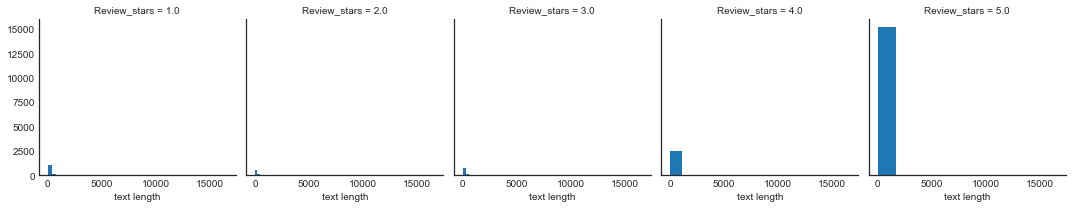

In [5]:
sns.set_style('white')
g = sns.FacetGrid(dataset,col='Review_stars')
g.map(plt.hist,'text length')

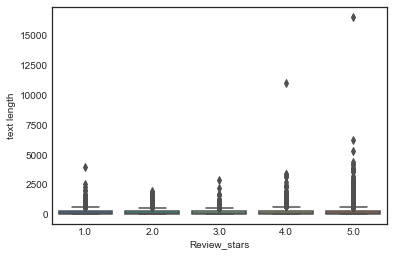

In [9]:
sns.boxplot(x='Review_stars',y='text length',data=dataset,palette='rainbow')

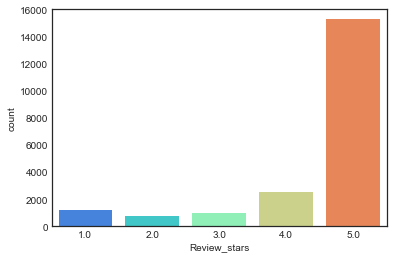

In [10]:
sns.countplot(x='Review_stars',data=dataset,palette='rainbow')

# Tokenization & Lemmatization

In [6]:
def tokenize(text):
    tokenized = word_tokenize(text)
    no_punc = []
    for review in tokenized:
        line = "".join(char for char in review if char not in string.punctuation)
        no_punc.append(line)
    tokens = lemmatize(no_punc)
    return [word for word in tokens if word.lower() not in stopwords.words('english')]

def lemmatize(tokens):
    lmtzr = WordNetLemmatizer()
    lemma = [lmtzr.lemmatize(t) for t in tokens]
    return lemma

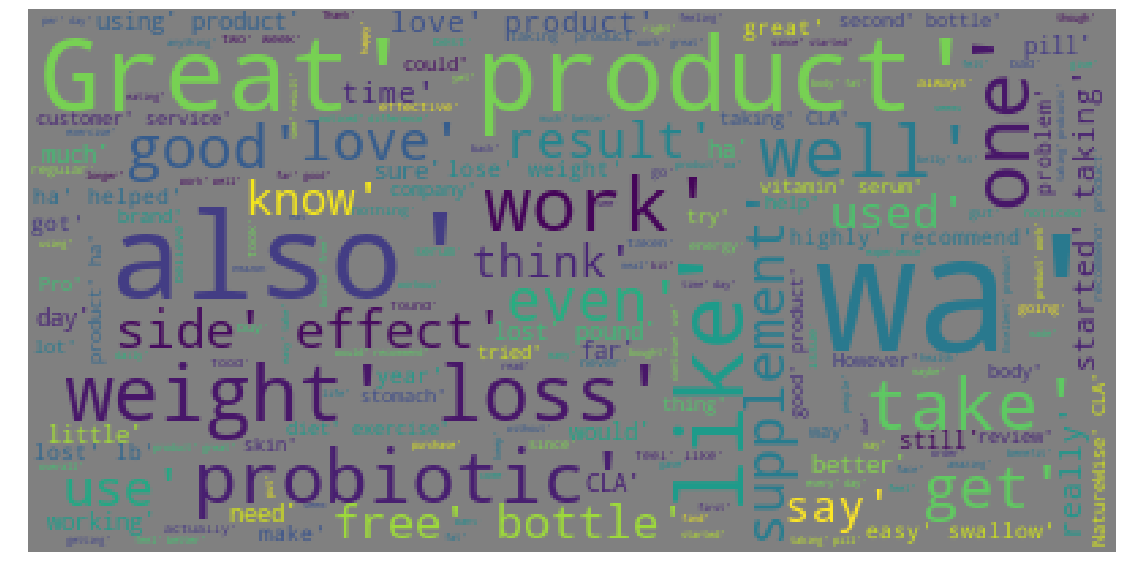

In [12]:
review_full=dataset["Product full review"]
review_full=review_full.apply(lambda x: tokenize(str(x)))
str_review_full=str(review_full)
s=[]
for i in review_full:
     str_review_full=str(i)
     s.append(str_review_full)
cloud = wordcloud.WordCloud(background_color='gray', max_font_size=60,relative_scaling=1).generate(' '.join(s))    
fig = plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(cloud);

## Categorizing Reviews, 1-2 Stars Negative, 4-5 Stars Positive and 3 Stars Neutral (Removing Neutral Reviews)

In [7]:
int_ratings=[]

Review_stars    
type(Review_stars)    

new=[]
for y in Review_stars:
    if y=='5.0':
        z=5
        new.append(z)
    elif y=='4.0':
        z=4
        new.append(z)
    elif y=='3.0':
        z=3
        new.append(z)
    elif y=='2.0':
        z=2
        new.append(z)
    else :
        z=1
        new.append(z)
        
dataset["neg_or_pos"]=[1 if rate>3 else 0 for rate in new]

In [8]:
dataset['Review_stars']= pd.to_numeric(dataset['Review_stars'])
dataset = dataset[dataset.Review_stars != 3]

## Creating CountVectorizer & Removing Stop Words from our Dataset

In [26]:
tf_vectorizer = CountVectorizer(ngram_range=(1,2),stop_words = 'english')
model = tf_vectorizer.fit(dataset["Product full review"])


In [18]:
X = dataset['Product full review'].values.astype('str')
y= dataset['neg_or_pos']

### Creating Temp File to read it as chunk

In [32]:
Temp=pd.DataFrame({'Product Review summary':dataset['Product full review'],'neg_or_pos':dataset['neg_or_pos']})

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:77: RuntimeWarning: '>' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


In [34]:
Temp.to_csv('/Users/Kartik/Downloads/Temp.csv') 

In [60]:
#c = CountVectorizer(stop_words = 'english')

def text_fit(X, y, model,clf_model,coef_show=1):
    
    X_c = model.transform(X)
    print('# features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.partial_fit(X_train, y_train,classes=np.unique(y_train))
    acc.append(clf.score(X_test, y_test))
    print ('Model Accuracy: {}'.format(acc))
    return(model.get_feature_names(),clf.coef_.tolist()[0],clf2.predict(X_test),clf2.predict(X_train),y_train, y_test)
    
  
#text_fit(X, y, model, LogisticRegression())

In [61]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
acc=[]
k=1
clf2 = SGDClassifier(alpha=.0005,loss='log',penalty='l1',max_iter=5,eta0=0.01,learning_rate='optimal')
roc_auc_clf2 =[]
roc_auc_clf2_Train =[]
Length_of_Batch =[]
for i,chunk in enumerate(pd.read_csv("/Users/Kartik/Downloads/Temp.csv", chunksize=1111)):
    Length_of_Batch.append(len(chunk))
    chunk= chunk.dropna()
    X = chunk['Product Review summary'].values.astype('str')
    y= chunk['neg_or_pos']
    
    w,coef,TP2,TP_Train2,y_train, y_test = text_fit(X, y, model, clf2)
    if k ==1:
        
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        k= k+1
    else:
        df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df= coeff_df.append(df)
    # AUC Test
    FP2 = np.array(y_test)
    fpr2, tpr2,_ = roc_curve(FP2,TP2)
    roc_auc_clf2.append(auc(fpr2,tpr2,reorder=True))
    
    # AUC Train
    FP_Train2 = np.array(y_train)
    fpr2_train, tpr2_train,_ = roc_curve(FP_Train2,TP_Train2)
    roc_auc_clf2_Train.append(auc(fpr2_train,tpr2_train,reorder=True))

coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
coeff_df = coeff_df.drop_duplicates(subset=['Word'])
print('')
print('-Top 20 positive-')
print(coeff_df.head(20).to_string(index=False))
print('')
print('-Top 20 negative-')        
print(coeff_df.tail(20).to_string(index=False))
    

# features: 178778
# train records: 832
# test records: 278
Model Accuracy: [0.91366906474820142]
# features: 178778
# train records: 832
# test records: 278
Model Accuracy: [0.91366906474820142, 0.85971223021582732]
# features: 178778
# train records: 833
# test records: 278
Model Accuracy: [0.91366906474820142, 0.85971223021582732, 0.8920863309352518]
# features: 178778
# train records: 833
# test records: 278
Model Accuracy: [0.91366906474820142, 0.85971223021582732, 0.8920863309352518, 0.90287769784172667]
# features: 178778
# train records: 833
# test records: 278
Model Accuracy: [0.91366906474820142, 0.85971223021582732, 0.8920863309352518, 0.90287769784172667, 0.93165467625899279]
# features: 178778
# train records: 833
# test records: 278
Model Accuracy: [0.91366906474820142, 0.85971223021582732, 0.8920863309352518, 0.90287769784172667, 0.93165467625899279, 0.92446043165467628]
# features: 178778
# train records: 832
# test records: 278
Model Accuracy: [0.91366906474820142, 0.8

In [13]:
print(sum(acc)/len(acc))

0.927849590247


In [85]:
nbatch = len(Length_of_Batch)
Total = sum(Length_of_Batch)

In [ ]:
# AUC Curve for Test Results

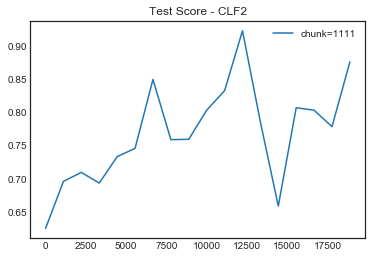

In [86]:
plt.plot(1111*np.arange(int(nbatch)),roc_auc_clf2,label='chunk=1111')
plt.title('Test Score - CLF2')
plt.legend()
plt.show()

In [ ]:
# AUC Curve for Train Results

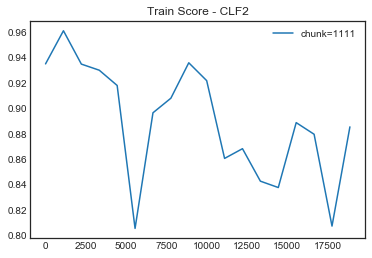

In [87]:
plt.plot(1111*np.arange(int(nbatch)),roc_auc_clf2_Train,label='chunk=1111')
plt.title('Train Score - CLF2')
plt.legend()
plt.show()

In [73]:
print('average_auc_clf2_test:')
print(sum(roc_auc_clf2)/len(roc_auc_clf2))
print('average_auc_clf2_train:')
print(sum(roc_auc_clf2_Train)/len(roc_auc_clf2_Train))

average_auc_clf2_test:
0.651980855293
average_auc_clf2_train:
0.671003787124


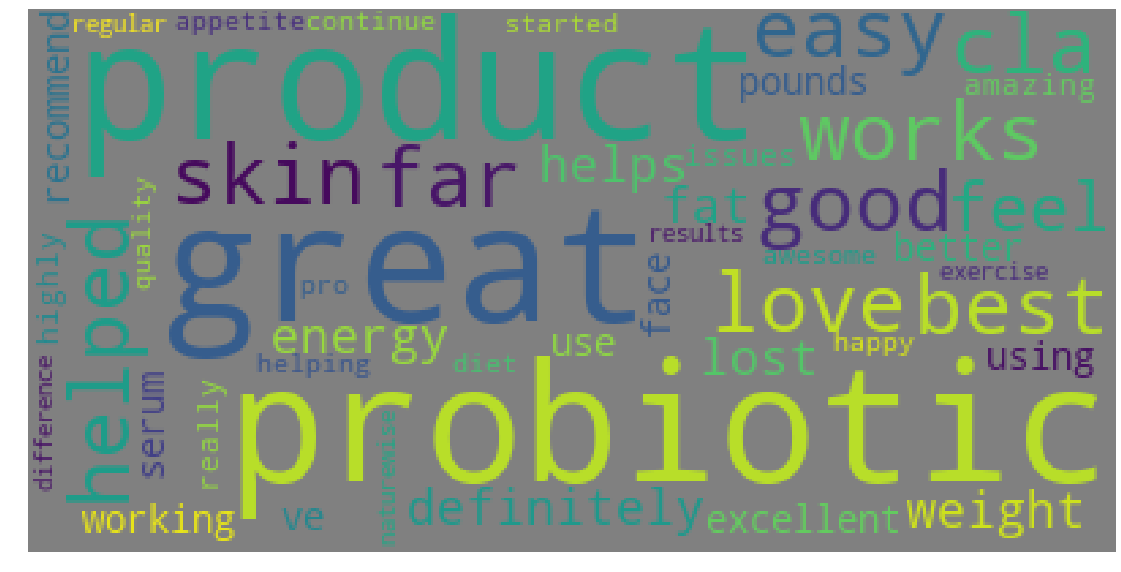

In [81]:
# Frequency of Most Words in Positive Review
s=[]
Positive_Words = coeff_df['Word'].head(50)
for i in Positive_Words:
     str_review_full=str(i)
     s.append(str_review_full)
cloud = wordcloud.WordCloud(background_color='gray', max_font_size=60,relative_scaling=1).generate(' '.join(s))    
fig = plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(cloud);

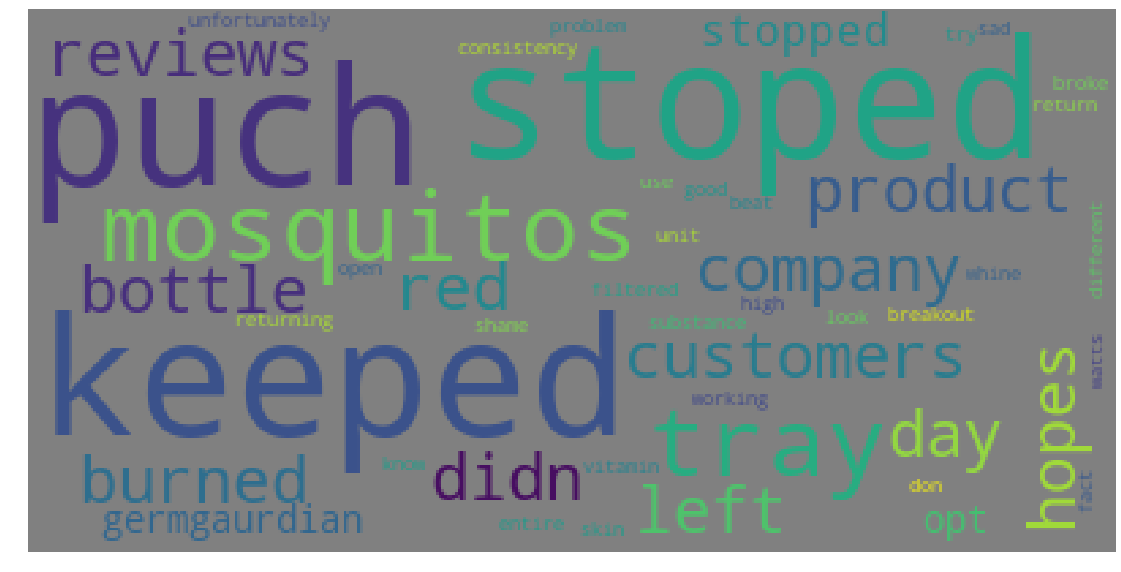

In [83]:
# Frequency of Most Words in Negative Review
s=[]
Negative_Words = coeff_df['Word'].tail(50)
for i in Negative_Words:
     str_review_full=str(i)
     s.append(str_review_full)
cloud = wordcloud.WordCloud(background_color='gray', max_font_size=60,relative_scaling=1).generate(' '.join(s))    
fig = plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(cloud);

# Non- Linear Model

In [16]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
acc=[]
k=1
clf2 = MultinomialNB()
roc_auc_clf2 =[]
roc_auc_clf2_Train =[]
Length_of_Batch =[]
for i,chunk in enumerate(pd.read_csv("/Users/Kartik/Downloads/Temp.csv", chunksize=1111)):
    Length_of_Batch.append(len(chunk))
    chunk= chunk.dropna()
    X = chunk['Product Review summary'].values.astype('str')
    y= chunk['neg_or_pos']
    
    w,coef,TP2,TP_Train2,y_train, y_test = text_fit(X, y, model, clf2)
    if k ==1:
        
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        k= k+1
    else:
        df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df= coeff_df.append(df)
    # AUC Test
    FP2 = np.array(y_test)
    fpr2, tpr2,_ = roc_curve(FP2,TP2)
    roc_auc_clf2.append(auc(fpr2,tpr2,reorder=True))
    
    # AUC Train
    FP_Train2 = np.array(y_train)
    fpr2_train, tpr2_train,_ = roc_curve(FP_Train2,TP_Train2)
    roc_auc_clf2_Train.append(auc(fpr2_train,tpr2_train,reorder=True))

coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
coeff_df = coeff_df.drop_duplicates(subset=['Word'])
print('')
print('-Top 20 positive-')
print(coeff_df.head(20).to_string(index=False))
print('')
print('-Top 20 negative-')        
print(coeff_df.tail(20).to_string(index=False))
    

# features: 178778
# train records: 832
# test records: 278
Model Accuracy: [0.9532374100719424]
# features: 178778
# train records: 832
# test records: 278
Model Accuracy: [0.9532374100719424, 0.85251798561151082]
# features: 178778
# train records: 833
# test records: 278
Model Accuracy: [0.9532374100719424, 0.85251798561151082, 0.88129496402877694]
# features: 178778
# train records: 833
# test records: 278
Model Accuracy: [0.9532374100719424, 0.85251798561151082, 0.88129496402877694, 0.88129496402877694]
# features: 178778
# train records: 833
# test records: 278
Model Accuracy: [0.9532374100719424, 0.85251798561151082, 0.88129496402877694, 0.88129496402877694, 0.91366906474820142]
# features: 178778
# train records: 833
# test records: 278
Model Accuracy: [0.9532374100719424, 0.85251798561151082, 0.88129496402877694, 0.88129496402877694, 0.91366906474820142, 0.8920863309352518]
# features: 178778
# train records: 832
# test records: 278
Model Accuracy: [0.9532374100719424, 0.85251

In [17]:
print(sum(acc)/len(acc))

0.911784393623


In [18]:
nbatch = len(Length_of_Batch)
Total = sum(Length_of_Batch)

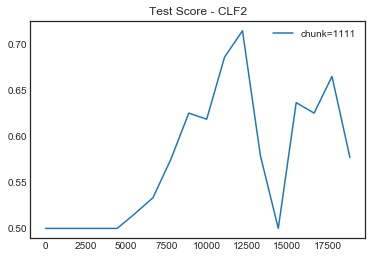

In [19]:
# AUC Curve for Test Results
plt.plot(1111*np.arange(int(nbatch)),roc_auc_clf2,label='chunk=1111')
plt.title('Test Score - CLF2')
plt.legend()
plt.show()

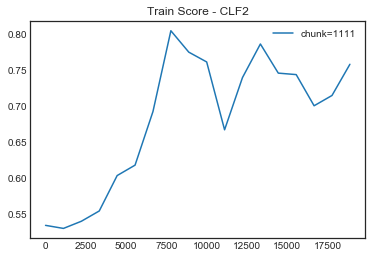

In [20]:
# AUC Curve for Train Results
plt.plot(1111*np.arange(int(nbatch)),roc_auc_clf2_Train,label='chunk=1111')
plt.title('Train Score - CLF2')
plt.legend()
plt.show()

In [21]:
print('average_auc_clf2_test:')
print(sum(roc_auc_clf2)/len(roc_auc_clf2))
print('average_auc_clf2_train:')
print(sum(roc_auc_clf2_Train)/len(roc_auc_clf2_Train))

average_auc_clf2_test:
0.574989279417
average_auc_clf2_train:
0.681207687697


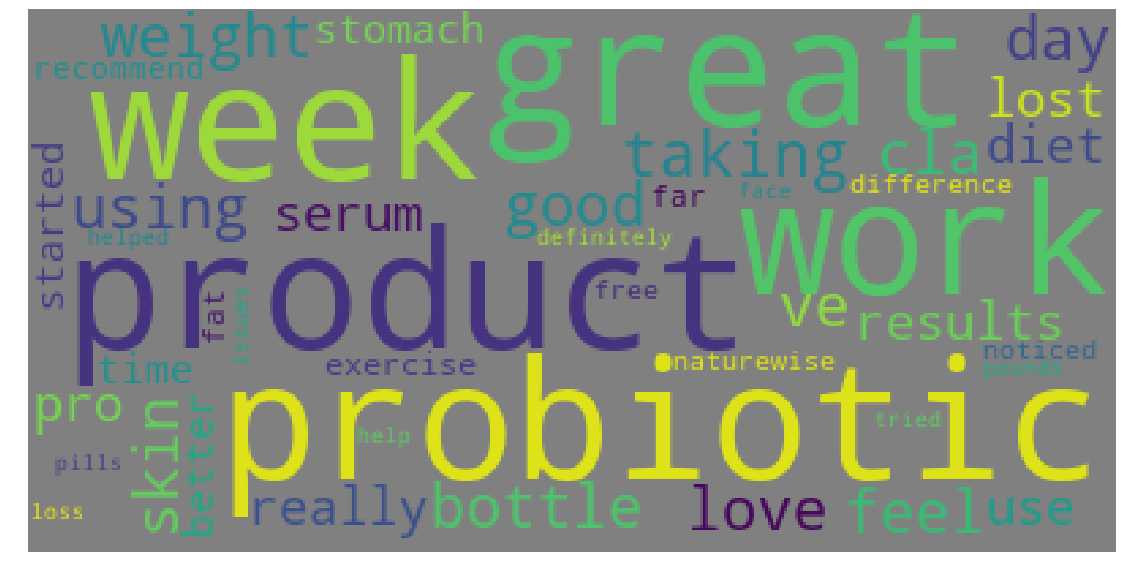

In [22]:
# Frequency of Most Words in Positive Review
s=[]
Positive_Words = coeff_df['Word'].head(50)
for i in Positive_Words:
     str_review_full=str(i)
     s.append(str_review_full)
cloud = wordcloud.WordCloud(background_color='gray', max_font_size=60,relative_scaling=1).generate(' '.join(s))    
fig = plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(cloud);

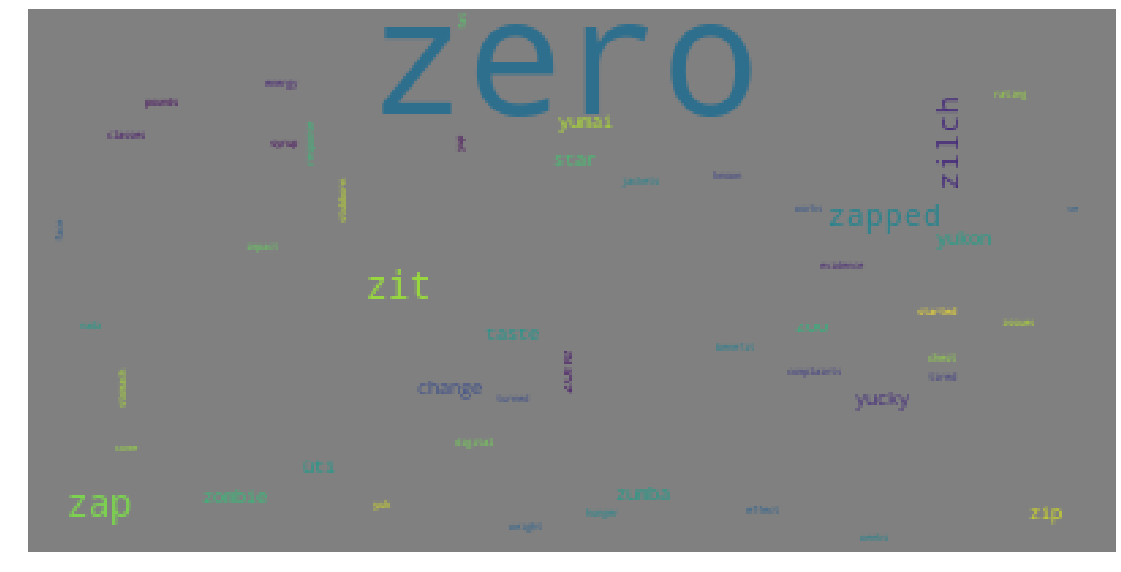

In [23]:
# Frequency of Most Words in Negative Review
s=[]
Negative_Words = coeff_df['Word'].tail(50)
for i in Negative_Words:
     str_review_full=str(i)
     s.append(str_review_full)
cloud = wordcloud.WordCloud(background_color='gray', max_font_size=60,relative_scaling=1).generate(' '.join(s))    
fig = plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(cloud);

# Validation

In [34]:
#######Importing dataset########
validation=pd.read_csv("/Users/Kartik/Downloads/Product_Test.csv")

In [35]:
########## For extracting stars value from complete ratings text#####
Review_stars=[]
for ratings in validation['Ratings']:
    rate=ratings.split(" ")[0]
    Review_stars.append(rate)

validation['Review_stars']=Review_stars
validation['Product full review']= validation['Product full review'].values.astype('str')
validation['text length'] =validation['Product full review'].apply(len)
type(validation['Product full review'])

pandas.core.series.Series

In [40]:
int_ratings=[]

Review_stars    
type(Review_stars)    

new=[]
for y in Review_stars:
    if y=='5.0':
        z=5
        new.append(z)
    elif y=='4.0':
        z=4
        new.append(z)
    elif y=='3.0':
        z=3
        new.append(z)
    elif y=='2.0':
        z=2
        new.append(z)
    else :
        z=1
        new.append(z)
        
validation["neg_or_pos"]=[1 if rate>3 else 0 for rate in new]

In [43]:
validation['Review_stars']= pd.to_numeric(validation['Review_stars'])
validation = validation[validation.Review_stars != 3]

In [44]:
tf_vectorizer = CountVectorizer(ngram_range=(1,2),stop_words = 'english')


In [96]:
X = validation['Product full review'].values.astype('str')
y= validation['neg_or_pos']

In [63]:
X= model.transform(X)

In [69]:
Prediction = clf2.predict(X)

In [72]:
acc = clf2.score(X, y)
print('Accuracy of our Validation Model')
acc

Accuracy of our Validation Model


0.98372329603255337

In [74]:
# Classification_report function to see how correct is our model
print(classification_report(y,Prediction))
print(confusion_matrix(y,Prediction))


             precision    recall  f1-score   support

          0       0.81      0.85      0.83        46
          1       0.99      0.99      0.99       937

avg / total       0.98      0.98      0.98       983

[[ 39   7]
 [  9 928]]


In [105]:
# Overall Review Orginally
Positive=validation[validation.neg_or_pos == 1].count()[1]
Negative= validation[validation.neg_or_pos == 0].count()[1]
Ratio_Positive = Positive/y.count()
if Ratio_Positive > 0.5:
    print('Good Product to Buy, with Ratio:')
    print(Ratio_Positive)
else:
    print('Not Good Product to Buy, with Ratio:')
    print(1- Ratio_Positive)

Good Product to Buy, with Ratio:
0.881909547739


In [115]:
# Overall Review Prediction
Positive=sum(1 for item in Prediction if item==(1))
Negative= sum(1 for item in Prediction if item==(0))
Ratio_Positive = Positive/len(Prediction)
if Ratio_Positive > 0.5:
    print('Good Product to Buy, with Ratio:')
    print(Ratio_Positive)
else:
    print('Not Good Product to Buy, with Ratio:')
    print(1- Ratio_Positive)

Good Product to Buy, with Ratio:
0.9511698880976602
